In [1]:
## Our default imports: who can live without these :)
%matplotlib inline
import warnings
warnings.filterwarnings('default', category=DeprecationWarning, module='.*/mypackage/.*')
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import jsP2
jsP2.start()

# Welcome to JSPlot!

### Real Time Widgets in HTML Exports


The goal of this project is to create a set of tools to allow for interactive input/output without an iPython backend. To see what we mean, check out [A Live Version](https://dibya.xyz/JupyterJSPlot.html)


This project stems from the fact, that when distributing teaching materials, students are often limited in their resources; not only may they not have access to computers, oftentimes, they don't have the technical expertise to get everything set up. Thus, the web!

Ipython has a set of very nifty tools called widgets (ipywidgets), which allow for interactive input, allowing one to see the effects of tweaking parameters in various functions.  We want to bring the same functionality to HTML pages, without sacrificing ease of use on the developer end.

### How it Works


We use cell magics, a tool in iPython, to bring widgetry to HTML. Consider a cell like this

    ###################
    %%jsPlot chartType [parameterName,start,end,step] ...

    def data(yourParameters):
        called every time parameters change
    ###################
    
chartType can be any of the following:
- l : line
- b : bar
- lb: line+bar


Here's an example 
    ########################
    %%jsPlot l ['x',0,10,1]
    def data(x):
        r = list(range(x))
        y = [math.pow(i,2) for i in r]
        plot(r,y)
        console.log(y)
        bar(r,r)
    #########################

In [2]:
%%jsPlot l ['x',0,10,1]
def data(x):
    r = list(range(x))
    y = [math.pow(i,2) for i in r]
    plot(r,y)
    console.log(y)
    bar(r,r)

l
 ['x',0,10,1]
1


In [3]:
%%jsPlot l ['n',0,100,5], ['p',0,1,.1]
#BINOMIAL PROBABILITIES

def prob(n,p,x):
	q = 1-p
	nx = n - x
	return jStat.combination(n,x)*Math.pow(p,x)*Math.pow(q,nx)

def data(n,p):
    x = list(range(n+1))
    y =  [prob(n,p,i) for i in x]
    y2 = [jStat.normal.pdf(i,n*p,math.sqrt(n*p*(1-p))) for i in x]
    plot(x,y)
    plot(x,y2)


l
 ['n',0,100,5], ['p',0,1,.1]
2


In [4]:
%%jsPlot b ['mu',0,10,1]
#POISSON PROBABILITIES

def factorial(x):
    i = 1
    for _ in range(1,x+1):
        i *= _
    return i

def prob(mu,x):
	return math.pow(math.E,-1*mu)*math.pow(mu,x)/factorial(x)

def data(mu):
    x = list(range(4*mu))
    y = [prob(mu,i) for i in x]
    write("Hi")
    bar(x,y)


b
 ['mu',0,10,1]
3


In [5]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed


In [6]:
def plots(expr,val,discrete=False):
    variable,start,end = val
    if discrete:
        x = np.linspace(start,end,end-start+1)
    else:
        x = np.linspace(start,end,100)
    y = [expr.subs(variable,i).evalf() for i in x]
    if not discrete:
        plt.plot(x,y)
    else:
        plt.bar(x-.5,y)
    plt.ylim(ymin=0)

In [7]:
import mpmath
class BinomialDistribution:
    def __init__(self,n,p):
        self.x = symbols("x")
        self.formula = binomial(n,x)*p**x*(1-p)**(n-x)
        self.n = n
        self.p = p
    def plot(self):
        plots(self.formula,(self.x,0,self.n),True)

    def vary(startn=10,startp=.5):
        import time
        a = time.time()
        def plott(n,p):
            nonlocal a
            if time.time()-a < .1:
                return
            BinomialDistribution(n,p).plot()
            a = time.time()
        interact(plott,n=widgets.IntSlider(min=1,max=200,value=startn),p=widgets.FloatSlider(value=startp,min=0,max=1,step=.01))


In [8]:
%matplotlib inline
BinomialDistribution.vary()

# Estimating Pi

In this example, we use monte-carlo simulation to estimate the value of $\pi$. The goal of this experiment is to introduce more creative methods of sampling to obtain our estimations.

Consider the unit circle, particularly the region in the 1st quadrant. As you know, the area of that region of the circle is $\frac{1}{4}\pi r^2$, or in our case , $\frac{\pi}{4}$. 

Now, let's pretend that we're dropping dots on the unit square [0,1]x[0,1]. What percentage of those dots do we expect to land inside the circle? 
$$p = \cfrac{\frac{\pi}{4}}{1} = \frac{\pi}{4}$$.

Let's say that we've dropped some dots on the unit square, and the approximate portion that landed in the circle was $\hat{p}$. What's our estimate for $\pi$?

$$\hat{\pi} = 4 * \hat{p}$$

78409 out of 100000 dots landed in the circle: p = 0.784090
Pi estimate is  3.13636


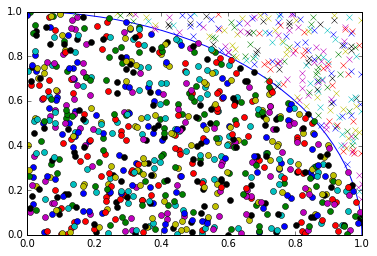

In [9]:
%matplotlib inline
circle1=plt.Circle((0,0),1,color='w',ec='b')
plt.gcf().gca().add_artist(circle1)
import random
import time
plt.xlim(0,1)
plt.ylim(0,1)
v = 0
n = 100000
for _ in range(n):
    x = random.random()
    y = random.random()
    if x**2 + y**2 > 1:
        if _%(n//1000) == True:
            plt.plot([x],[y],marker='x')
    else:
        if _%(n//1000) == True:
            plt.plot([x],[y],marker='o')
        v += 1

print("%d out of %d dots landed in the circle: p = %f"%(v,n,v/n))
print("Pi estimate is ", (v*4/n))